# Derivative: rate of change of a function/ slope of a curve

## Numeric Implementation of First Order Derivatives

Example function: f(x) = sin(x)x - (1/100)x**3

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
def f(x):
    return np.sin(x)*x - (1/100)*x**3

In [98]:
x_list = np.linspace(-10, 10, 201)
y_list = f(x_list)

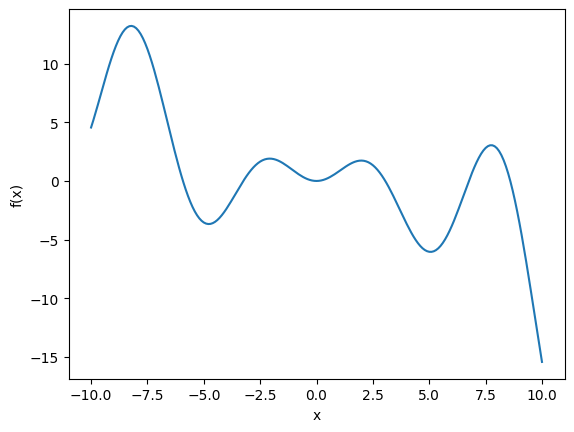

In [99]:
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(x_list, y_list)

Now we calculate the Derivative

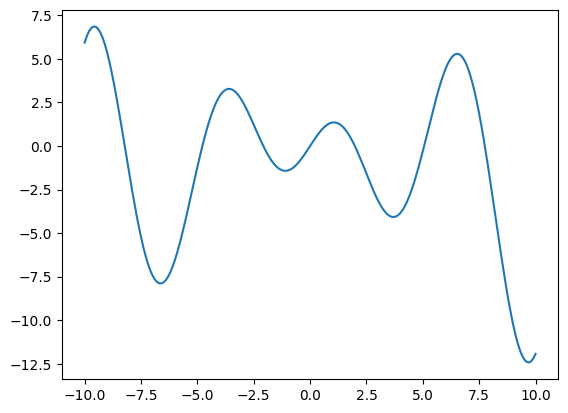

In [100]:
# since the function is simple, we can easily calculate the derivative for comparisons
analytical_derivative_list = np.cos(x_list)*x_list + np.sin(x_list) - 3/100*x_list**2 
plt.plot(x_list, analytical_derivative_list)

In [101]:
# let 'h' be the difference of two elements from x_list / stepsize

h = 0.1
forward_derivative_list = (f(x_list + h) - f(x_list)) / h
backward_derivative_list = (f(x_list) - f(x_list - h))/ h
central_derivative_list = (f(x_list + h) - f(x_list - h)) / (2*h)

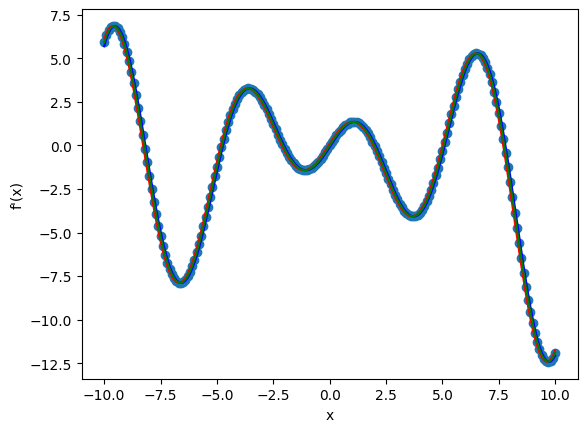

In [102]:
plt.xlabel('x')
plt.ylabel('f\'(x)')

plt.scatter(x_list, analytical_derivative_list)
plt.plot(x_list, forward_derivative_list, color ='red')
plt.plot(x_list, backward_derivative_list, color ='blue')
plt.plot(x_list, central_derivative_list, color ='green')

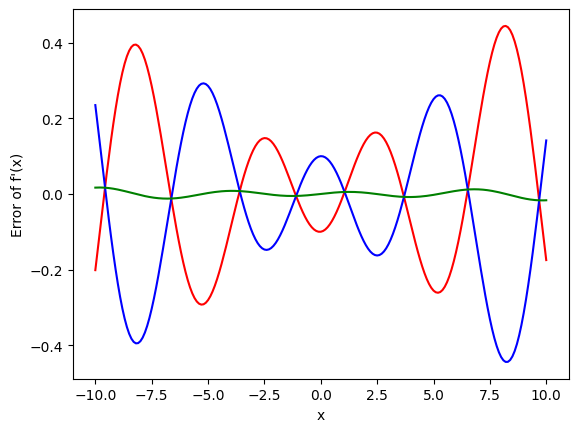

In [103]:
# To analyse the error
plt.xlabel('x')
plt.ylabel('Error of f\'(x)')

plt.plot(x_list, analytical_derivative_list - forward_derivative_list, color ='red')
plt.plot(x_list, analytical_derivative_list - backward_derivative_list, color ='blue')
plt.plot(x_list, analytical_derivative_list - central_derivative_list, color ='green')

## Richardson Method: A method to calculate the derivative with higher accuracy

In [104]:
def D1Richardson(f, x, h):
    # f: function
    # x: Argument of the function
    # h: stepsize
    return (f(x-(2*h)) - 8*f(x-h) + 8*f(x+h) - f(x+(2*h)))/ (12*h)

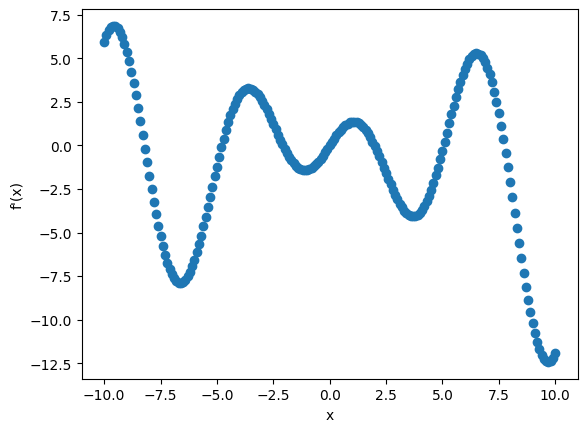

In [105]:
plt.xlabel('x')
plt.ylabel('f\'(x)')

richardson_derivative_list = D1Richardson(f, x_list, h)

plt.scatter(x_list, richardson_derivative_list)

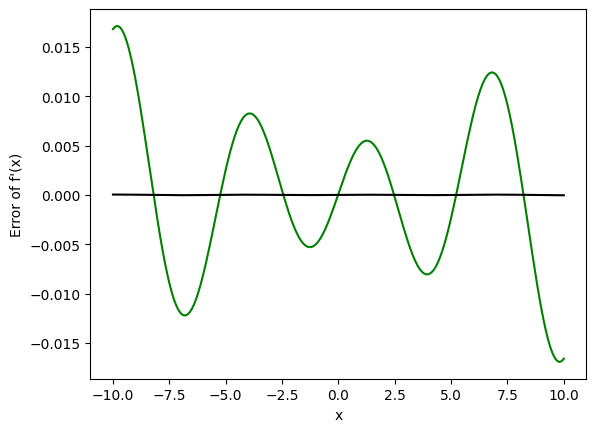

In [106]:
# To analyse the error
plt.xlabel('x')
plt.ylabel('Error of f\'(x)')

# plt.plot(x_list, analytical_derivative_list - forward_derivative_list, color ='red')
# plt.plot(x_list, analytical_derivative_list - backward_derivative_list, color ='blue')
plt.plot(x_list, analytical_derivative_list - central_derivative_list, color ='green')
plt.plot(x_list, analytical_derivative_list - richardson_derivative_list, color ='black')

### For higher accuracy, we use the iteration formula where we calculate D(n+1)

In [107]:
def D1nRichardson(nmax, f, x, h):
    # n: Order of iteration of the first Derivative
    # f: function
    # x: Argument of the function
    # h: stepsize
    
    # we need the result in the form of an array and to need to replace all the 'h' with 'h*2**j' where j in range of (n) for D0
    
    '''d0 = np.array([(f(x-(2*h*2**j)) - 8*f(x-h*2**j) + 8*f(x+h*2**j) - f(x+(2*h*2**j)))/ (12*h*2**j) 
                   for j in range(0,n)])'''
    '''
                                        (OR) 
        for j in range(0,n):
        d0 = np.array([D1Richardson(f, x, h*2**j)])
    ''' 
    # for calculating D
    '''for i in range(1,n):
        print(d0)
        d = np.array([ ((2**2*i * d0[j]) - d0[j+1]) / (2**(2*i) - 1) for j in range(len(d0) - 1)])
        d0 = d
    return d'''





    d0 = np.array([ 1/(12*h*2**j) * ( f(x-2*h*2**j) - 8*f(x-h*2**j) + 8*f(x+h*2**j) - f(x+2*h*2**j) ) for j in range(0,nmax)])
    for n in range(1,nmax):
        print(d0)
        d = np.array([(2**(2*n)*d0[j] - d0[j+1]) / (2**(2*n)-1) for j in range(0,len(d0)-1)])
        d0 = d
    return d

In [108]:
d1n = D1nRichardson(5, f, 3, h)
# The result here is for D1

[-3.09884994 -3.09873722 -3.09695717 -3.06993837 -2.72051967]
[-3.09888752 -3.09933057 -3.10596344 -3.18641127]
[-3.09885798 -3.09888837 -3.10060025]
[-3.0988575 -3.0988612]


Comparison of D1n with D1. 

print(D1Richardson(f, 3, h))
print(D1Richardson(f, 3, 2*h))
print(D1Richardson(f, 3, 4*h))
print(D1Richardson(f, 3, 8*h))
print(D1Richardson(f, 3, 16*h))

Comparison with Analytical Value: cos(x)*x + sin(x) - 3/100*x**2 

In [109]:
np.cos(3)*3 + np.sin(3) - 3/100*3**2

np.float64(-3.098857481741469)

The error of D1N Richardson W.R.T Analytical value

In [110]:
3*np.cos(3) + np.sin(3) - 3/100*3**2 - d1n

array([1.18064047e-09])

## Second Order Derivatives

Using the same function f(x) = sin(x)x - (1/100)x**3

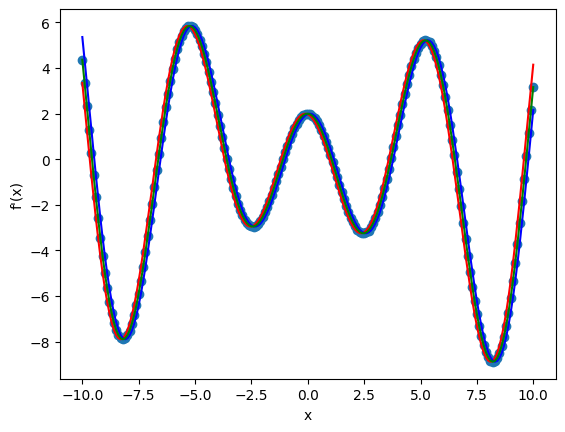

In [111]:
# The analytical value of f''(x)
analytical_derivative2_list = - np.sin(x_list)*x_list + 2*np.cos(x_list) - 6/100*x_list

h = 0.1
forward_derivative2_list = (f(x_list + 2*h) - 2*f(x_list + h) + f(x_list)) / h**2
backward_derivative2_list = (f(x_list) - 2*f(x_list - h) + f(x_list-2*h))/ h**2
central_derivative2_list = (f(x_list + h) + f(x_list - h) - 2*f(x_list)) / (h**2)

plt.xlabel('x')
plt.ylabel('f\'(x)')

plt.scatter(x_list, analytical_derivative2_list)
plt.plot(x_list, forward_derivative2_list, color ='red')
plt.plot(x_list, backward_derivative2_list, color ='blue')
plt.plot(x_list, central_derivative2_list, color ='green')

Comparing the Error

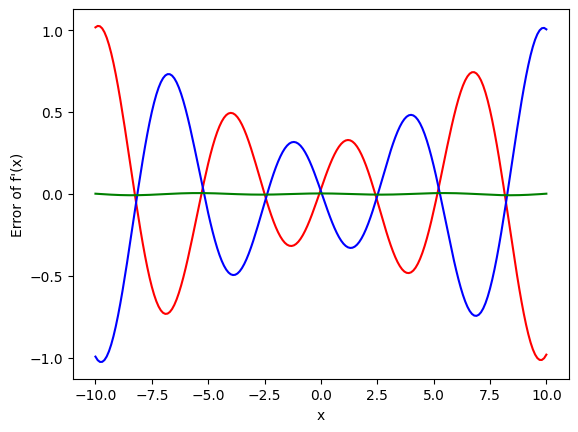

In [112]:
plt.xlabel('x')
plt.ylabel('Error of f\'(x)')

plt.plot(x_list, analytical_derivative2_list - forward_derivative2_list, color ='red')
plt.plot(x_list, analytical_derivative2_list - backward_derivative2_list, color ='blue')
plt.plot(x_list, analytical_derivative2_list - central_derivative2_list, color ='green')

For better accuracy, use Richardson Method again

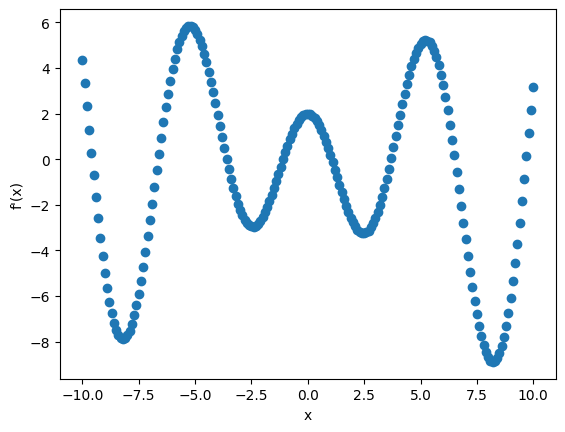

In [113]:
def D2Richardson(f, x, h):
    # f: function
    # x: Argument of the function
    # h: stepsize
    return (-f(x-(2*h)) + 16*f(x-h) -30*f(x) + 16*f(x+h) - f(x+(2*h)))/ (12*h**2)

plt.xlabel('x')
plt.ylabel('f\'(x)')

richardson_derivative2_list = D2Richardson(f, x_list, h)

plt.scatter(x_list, richardson_derivative2_list)

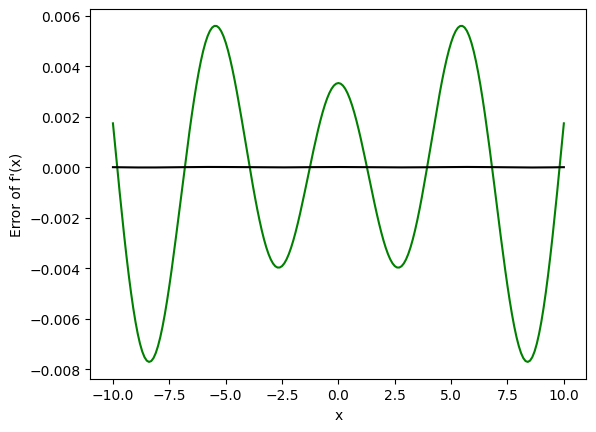

In [114]:
# To analyse the error
plt.xlabel('x')
plt.ylabel('Error of f\'(x)')

# plt.plot(x_list, analytical_derivative2_list - forward_derivative2_list, color ='red')
# plt.plot(x_list, analytical_derivative2_list - backward_derivative2_list, color ='blue')
plt.plot(x_list, analytical_derivative2_list - central_derivative2_list, color ='green')
plt.plot(x_list, analytical_derivative2_list - richardson_derivative2_list, color ='black')

## Multiorder Derivatives

Defined as a partial derivative of a multivariable function (f(x,y,z)) that is a derivative with respect to one variable with all the other variables held constant

In [115]:
def f(r):
    return np.exp(-r[0]**2 - r[1]**4)
                 # (-x**2 - y**4)
def g(r):
    return r/np.linalg.norm(r)

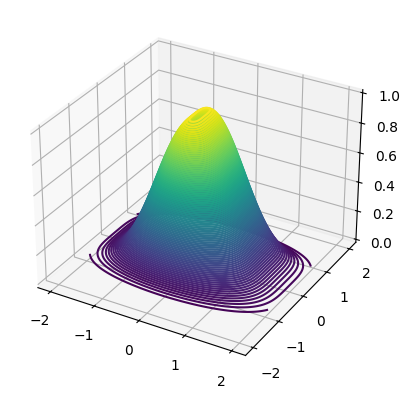

In [116]:
# f(r)
x, y = np.meshgrid(np.linspace(-2, 2, 201), np.linspace(-2,2,201))
z = f(np.array([x, y]))

proj = plt.axes(projection='3d')
proj.contour3D(x,y,z, 100)

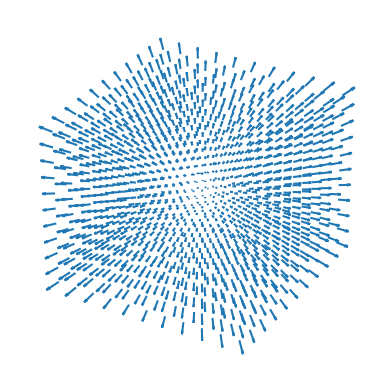

In [117]:
#g(r)
x2, y2, z2 = np.meshgrid(np.linspace(-2,2,11), np.linspace(-2,2,11), np.linspace(-2,2,11))
values = g(np.array([x2,y2,z2]))

# To plot using an arrow plot
arrowplot = plt.axes(projection = "3d")
arrowplot.axis(False)

scale = 7
arrowplot.quiver(
    x2, y2, z2,
    values[0]*scale, values[1]*scale, values[2]*scale
)

### Gradient

In [118]:
def gradient(f, r, h):
    # using central differences
    x, y, z = r
    partialx = (f(np.array([x+h, y, z])) - f(np.array([x-h, y, z]))) / (2*h)
    partialy = (f(np.array([x, y+h, z])) - f(np.array([x, y-h, z]))) / (2*h)
    partialz = (f(np.array([x, y, z+h])) - f(np.array([x, y, z-h]))) / (2*h)
    return np.array([partialx, partialy, partialz])


r = np.array([0.5, -1.2, 0])
h = 0.0001

gradient(f, r, h)

array([-0.09792044,  0.67682606,  0.        ])

### Divergent

In [119]:
def divergence(g, r, h):
    x, y, z = r
    dgxdx = (g(np.array([x + h, y, z]))[0]) - (g(np.array([x - h, y, z]))[0]) / (2*h)
    dgydy = (g(np.array([x, y+h, z]))[1]) - (g(np.array([x, y-h, z]))[1]) / (2*h)
    dgzdz = (g(np.array([x, y, z + h]))[2]) - (g(np.array([x, y, z-h]))[2]) / (2*h)
    return dgxdx + dgydy + dgzdz

divergence(g, r, h)

np.float64(2692.5386238659416)

### Curl

In [127]:
def curl(g, r, h):
    x, y, z = r
    dgxdy = (g(np.array([x, y + h, z]))[0] - g(np.array([x, y - h, z]))[0]) / (2*h)
    dgxdz = (g(np.array([x, y, z + h]))[0] - g(np.array([x, y, z - h]))[0]) / (2*h)
    dgydx = (g(np.array([x +  h, y, z]))[1] - g(np.array([x - h, y, z]))[1]) / (2*h)
    dgydz = (g(np.array([x, y, z + h]))[1] - g(np.array([x, y, z - h]))[1]) / (2*h)
    dgzdx = (g(np.array([x + h, y, z]))[2] - g(np.array([x - h, y, z]))[2]) / (2*h)
    dgzdy = (g(np.array([x, y + h, z]))[2] - g(np.array([x, y - h, z]))[2]) / (2*h)
    return np.array([dgzdy - dgydz, dgxdz - dgzdx, dgydx - dgxdy])


In [128]:
curl(g, r, h)

array([ 0.00000000e+00,  0.00000000e+00, -2.84466894e-09])